# lecture

## 11.1 convnet의 convolution layer만들기

: CNN이란 고양이가 어떤 이미지를 인식할 때 전체를 보는 것이 하닌 부분부분으로 인식하는 것에서 유래. 즉, 이것을 이용해 부분부분을 읽어 들여서 해석을 하고 그것을 통해 결과를 예측하는 것이다.

- Conv layers 만들기
 1. 부분으로 나누어 32 X 32 X 3(N)이 있으면 5 X 5 X 3(F)을 생각한다.이를 뽑아서 Wx+b라는 식을 구할 수 있고 이를 ReLU하여 overfitting을 없앤다.
 2. 옆으로 한칸 끝에 다다르면 밑으로 한칸 움직이면서 모든 부분을 검사한다.
 (움직이는 칸수(stride)는 설정해따라 다르다)
 => (N - F) / stride + 1
 3. 위 식을 이용하여 Convolution layers을 구할 수 있다. 아 Convolution layers을 반복하여 두꺼운 층을 생성하고 이 층의 부피를 구하게 되면 w을 구할 수 있다.

## 11.2 ConvNet Max pooling 과 Full Network

- Max pooling : 전체에서 뽑은 filter중에서 가장 큰 것만을 뽑아서 새로운 layer을 만드는 것(conv의 데이터를 ReLU를 통해 보기쉽게 만들고 pooling을 통해 정리)

# Programming

- convolution layer다루기
      :칸에 포함되는 수는 모두 더하면 된다.
  - Image 배열 : (그림의 수 , 크기 가로, 크기 세로, 색 개수)
  - Filter 배열: (크기 가로, 크기 세로, 색 개수, 필터 수)
  

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


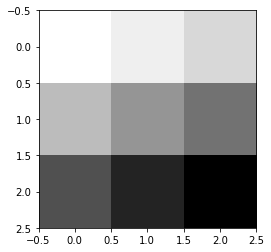

In [3]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


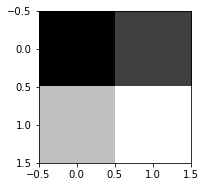

In [4]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

- padding
    - VALID : 필터된 크기 그대로 나온다.
    - SAME :  첫 이미지 크기에 맞춰서 나온다. 빈공간을 0으로 채워서 계산한다.

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


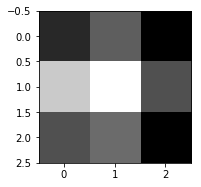

In [5]:
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

- FILTER의 개수 늘리기

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


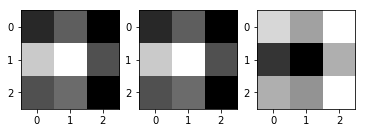

In [6]:
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

- Max Pooling : 이미지에 대해 원하는 부분만 뽑아낸다.

In [7]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[ 4.]]]]


In [8]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


- MNIST convolution layer

In [11]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


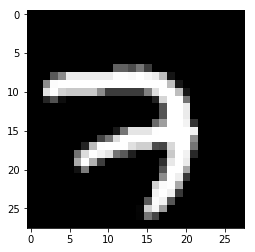

In [12]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

C:\Users\tjddu\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_4:0", shape=(1, 14, 14, 5), dtype=float32)


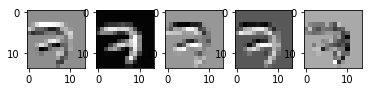

In [14]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
#위 그림을 다른 5장으로 뽑아내기

- MNIST Max pooling

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


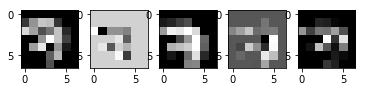

In [15]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

- CNN MNIST
      : 여기서 deep MNIST로 추가해준다면 정확도가 99% 까지 증가될 수 있다.
      : class를 통해서도 구현이 가능하고 tf.layers로 간단하게 구현이 가능하다.
- Ensemble : 여러개의 모델을 training시키고 새로운 데이터를 넣어 예측한 결과를 조합해 최종적으로 결과를 얻음(99.5%까지 정확도 측정)

In [17]:
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777) 
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
#Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
#Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
#Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [18]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Convolution      ->(?, 14, 14, 64)
#    Pooling      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

#Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
#Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
#Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
#Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)

In [19]:
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#train
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

#predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Learning started. It takes sometime.
Epoch: 0001 cost = 0.389101597
Epoch: 0002 cost = 0.100778718
Epoch: 0003 cost = 0.072349187
Epoch: 0004 cost = 0.058946750
Epoch: 0005 cost = 0.048726639
Epoch: 0006 cost = 0.042469820
Epoch: 0007 cost = 0.038190840
Epoch: 0008 cost = 0.033253184
Epoch: 0009 cost = 0.027884277
Epoch: 0010 cost = 0.026332836
Epoch: 0011 cost = 0.022258965
Epoch: 0012 cost = 0.020461032
Epoch: 0013 cost = 0.017529662
Epoch: 0014 cost = 0.015192947
Epoch: 0015 cost = 0.013747026
Learning Finished!
Accuracy: 0.9881
Label:  [7]
Prediction:  [7]
